In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
%matplotlib inline

### read csv file

In [2]:
#just read two csv file!
movie_df = pd.read_csv("movies.csv")
rating_df = pd.read_csv("ratings.csv")

# first Description

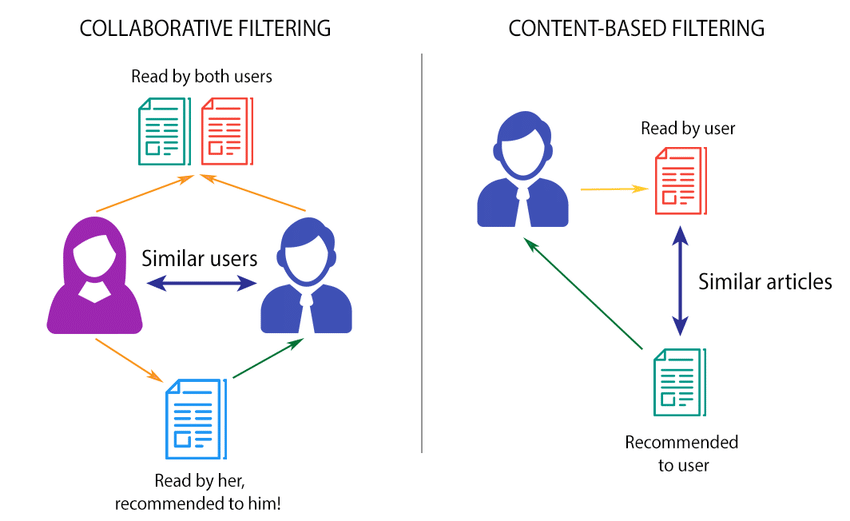

# Data Cleaning

In [3]:
movie_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
rating_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

for now we don't need timestamp. we just drop the cloumn, maybe in other examples it would be needed for better recomendation system.

In [5]:
rating_df = rating_df.drop('timestamp', 1)
rating_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1587516875.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rating_df = rating_df.drop('timestamp', 1)


userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

title and genres cloumns are sounds a little bit messy.We are gonna use regex for
deleting the year of fim and move it without () to a new cloumn in named  "year". 
and remove the year beside the title coulmn for just having the title of movie in the title coulmn.
an also change genres into a series so we can use each one of them seprated.
and we can do this with two function named split and extract in python. as we see:

In [6]:
movie_df['year'] = movie_df.title.str.extract('(\(\d\d\d\d\))',expand=False) #find year
movie_df['year'] = movie_df.year.str.extract('(\d\d\d\d)',expand=False)#remove ()
movie_df['title'] = movie_df.title.str.replace('(\(\d\d\d\d\))', '')#remove year in title cloumn
movie_df['title'] = movie_df['title'].apply(lambda x: x.strip())# roemove any space in title cloumn
movie_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1171676094.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df['title'] = movie_df.title.str.replace('(\(\d\d\d\d\))', '')#remove year in title cloumn


movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

split the genres whit (|) and make a array of them

In [7]:
#change genres to the serie
movie_df['genres'] = movie_df.genres.str.split('|')
movie_df.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                              genres  year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995  
1                     [Adventure, Children, Fantasy]  1995  
2                                  [Comedy, Romance]  1995  
3                           [Comedy, Drama, Romance]  1995  
4                                           [Comedy]  1995

# content-base recommendation

genres is not on the type we wanted.we must to be bulid new cloumns of binary mode of genres to use as matrix later.

In [8]:
#bulid a new cause we need a matrix of genres in binary mode
movieswg_df = movie_df.copy()
#just check if the each one of genres exist , if so put 1 and after the all we fill 0 for none.
for index, row in movie_df.iterrows():
    for genre in row['genres']:
        movieswg_df.at[index, genre] = 1
#fill the gernres how don't exist with 0
movieswg_df = movieswg_df.fillna(0)
movieswg_df.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                              genres  year  Adventure  \
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995        1.0   
1                     [Adventure, Children, Fantasy]  1995        1.0   
2                                  [Comedy, Romance]  1995        0.0   
3                           [Comedy, Drama, Romance]  1995        0.0   
4                                           [Comedy]  1995        0.0   

   Animation  Children  Comedy  Fantasy  Romance  ...  Horror  Mystery  \
0        1.0       1.0     1.0      1.0      0.0  ...     0.0      0.0   
1        0.0       1.0     0.0      1.0      0.0  ...     0.0      0.0   
2        0.0       0.0     1.0      0.0      1.0  ...     0.0      0.0   
3        0.0       0.0     1.0      0.0      1.0  ...     0.0      0.0   
4        0.0       0.0     1.0      0.0      0.0  ...     0.0      0.0   

   Sci-Fi  War  Musical  Documentary  IMAX  Western  Film-Noir  \
0     0.0  0.0      0.0          0.0   0.0      0.0        0.0   
1     0.0  0.0      0.0          0.0   0.0      0.0        0.0   
2     0.0  0.0      0.0          0.0   0.0      0.0        0.0   
3     0.0  0.0      0.0          0.0   0.0      0.0        0.0   
4     0.0  0.0      0.0          0.0   0.0      0.0        0.0   

   (no genres listed)  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 24 columns]

so for buliding this recommend system we just need a use how have some rating for some movies and we wanted to recommend movie/movies.
so we bulid one name userInput and turn into a dataframe to watch what we have.

In [9]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

title  rating
0  Breakfast Club, The     5.0
1            Toy Story     3.5
2              Jumanji     2.0
3         Pulp Fiction     5.0
4                Akira     4.5

so now we just add movieID to the new user for having the more exaxt data we want and remove the cloumn we do not wanted in the next steps.

In [10]:
#choose the movies who's name is in the movie of new user.
inputId = movie_df[movie_df['title'].isin(inputMovies['title'].tolist())]
#use merge function to add movieid to inputMovies
inputMovies = pd.merge(inputId, inputMovies)
#remove the data we don't need.like year and genres(the format we don't use.)
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
inputMovies

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1124514770.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1124514770.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputMovies = inputMovies.drop('genres', 1).drop('year', 1)


movieId                title  rating
0        1            Toy Story     3.5
1        2              Jumanji     2.0
2      296         Pulp Fiction     5.0
3     1274                Akira     4.5
4     1968  Breakfast Club, The     5.0

remember the matrix we have to add genres in binary model. now in that data we just save the movies we wanted(new user watched) and drop the others.we add this movies to data set

In [11]:
#Filtering out the movies from the input
userMovies = movieswg_df[movieswg_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

movieId                title  \
0           1            Toy Story   
1           2              Jumanji   
257       296         Pulp Fiction   
973      1274                Akira   
1445     1968  Breakfast Club, The   

                                                 genres  year  Adventure  \
0     [Adventure, Animation, Children, Comedy, Fantasy]  1995        1.0   
1                        [Adventure, Children, Fantasy]  1995        1.0   
257                    [Comedy, Crime, Drama, Thriller]  1994        0.0   
973              [Action, Adventure, Animation, Sci-Fi]  1988        1.0   
1445                                    [Comedy, Drama]  1985        0.0   

      Animation  Children  Comedy  Fantasy  Romance  ...  Horror  Mystery  \
0           1.0       1.0     1.0      1.0      0.0  ...     0.0      0.0   
1           0.0       1.0     0.0      1.0      0.0  ...     0.0      0.0   
257         0.0       0.0     1.0      0.0      0.0  ...     0.0      0.0   
973         1.0       0.0     0.0      0.0      0.0  ...     0.0      0.0   
1445        0.0       0.0     1.0      0.0      0.0  ...     0.0      0.0   

      Sci-Fi  War  Musical  Documentary  IMAX  Western  Film-Noir  \
0        0.0  0.0      0.0          0.0   0.0      0.0        0.0   
1        0.0  0.0      0.0          0.0   0.0      0.0        0.0   
257      0.0  0.0      0.0          0.0   0.0      0.0        0.0   
973      1.0  0.0      0.0          0.0   0.0      0.0        0.0   
1445     0.0  0.0      0.0          0.0   0.0      0.0        0.0   

      (no genres listed)  
0                    0.0  
1                    0.0  
257                  0.0  
973                  0.0  
1445                 0.0  

[5 rows x 24 columns]

now we need to extract the matrix of genres in binary mode from dataset so we drop all we do not need.

In [12]:
#reset to avoid anny problem
userMovies = userMovies.reset_index(drop=True)
#remove all the information we not gonna used.
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1038770389.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1038770389.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1038770389.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\1038770389.py:4: FutureWarning: In a future version of pa

Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  Action  \
0        1.0        1.0       1.0     1.0      1.0      0.0    0.0     0.0   
1        1.0        0.0       1.0     0.0      1.0      0.0    0.0     0.0   
2        0.0        0.0       0.0     1.0      0.0      0.0    1.0     0.0   
3        1.0        1.0       0.0     0.0      0.0      0.0    0.0     1.0   
4        0.0        0.0       0.0     1.0      0.0      0.0    1.0     0.0   

   Crime  Thriller  Horror  Mystery  Sci-Fi  War  Musical  Documentary  IMAX  \
0    0.0       0.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   
1    0.0       0.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   
2    1.0       1.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   
3    0.0       0.0     0.0      0.0     1.0  0.0      0.0          0.0   0.0   
4    0.0       0.0     0.0      0.0     0.0  0.0      0.0          0.0   0.0   

   Western  Film-Noir  (no genres listed)  
0      0.0        0.0                 0.0  
1      0.0        0.0                 0.0  
2      0.0        0.0                 0.0  
3      0.0        0.0                 0.0  
4      0.0        0.0                 0.0

all we see above is matrix we gonna use in our algorithm. as it was described.
and the next step we are gonna to weighted this matrix with all the rating user gives the movies. as we see :

In [13]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [14]:
#now we multiplication the matrix of genres of film and the matrix of ratings.
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
userProfile
#here useprofile just mentioned the weighted matrix.

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
War                    0.0
Musical                0.0
Documentary            0.0
IMAX                   0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [15]:
# we are just genre of movies(all movies) from firt dataset.
genreTable = movieswg_df.set_index(movieswg_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\3762222990.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\3762222990.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\3762222990.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15144\3762222990.py:4: FutureWarning: In a future version of pandas all arg

Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  \
movieId                                                                    
1              1.0        1.0       1.0     1.0      1.0      0.0    0.0   
2              1.0        0.0       1.0     0.0      1.0      0.0    0.0   
3              0.0        0.0       0.0     1.0      0.0      1.0    0.0   
4              0.0        0.0       0.0     1.0      0.0      1.0    1.0   
5              0.0        0.0       0.0     1.0      0.0      0.0    0.0   

         Action  Crime  Thriller  Horror  Mystery  Sci-Fi  War  Musical  \
movieId                                                                   
1           0.0    0.0       0.0     0.0      0.0     0.0  0.0      0.0   
2           0.0    0.0       0.0     0.0      0.0     0.0  0.0      0.0   
3           0.0    0.0       0.0     0.0      0.0     0.0  0.0      0.0   
4           0.0    0.0       0.0     0.0      0.0     0.0  0.0      0.0   
5           0.0    0.0       0.0     0.0      0.0     0.0  0.0      0.0   

         Documentary  IMAX  Western  Film-Noir  (no genres listed)  
movieId                                                             
1                0.0   0.0      0.0        0.0                 0.0  
2                0.0   0.0      0.0        0.0                 0.0  
3                0.0   0.0      0.0        0.0                 0.0  
4                0.0   0.0      0.0        0.0                 0.0  
5                0.0   0.0      0.0        0.0                 0.0

and now for the next step we just need to use userprofile(base on the matrix we build) and the use matrix of genres of all movies. and from this two we can just bulid a weighted matrix of all movie and choose which one is better to recommend. actually we are gonna bulid a recommendation matrix.

In [16]:
#we are bulid the matrix i was mentioned and notice that we are gonna use avergae rating to bulid this(0<x<1)
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

so for now  we just need to sort this for recommend to our new user.

In [17]:
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
recommendationTable_df.head()

movieId
134853    0.734266
148775    0.685315
117646    0.678322
6902      0.678322
81132     0.671329
dtype: float64

obviously we not gonna give movieId to user! we usr the orginal dataset to show name/year/genres to user.

In [18]:
movie_df.loc[movie_df['movieId'].isin(recommendationTable_df.head(20).keys())]

movieId                                              title  \
559       673                                          Space Jam   
1390     1907                                              Mulan   
2250     2987                           Who Framed Roger Rabbit?   
3460     4719                                      Osmosis Jones   
4631     6902                                      Interstate 60   
5490    26340  Twelve Tasks of Asterix, The (Les douze travau...   
5819    32031                                             Robots   
6047    40339                                     Chicken Little   
6448    51939                TMNT (Teenage Mutant Ninja Turtles)   
6455    52287                                 Meet the Robinsons   
6879    62956                            Futurama: Bender's Game   
7441    81132                                             Rubber   
7550    85261                                    Mars Needs Moms   
8349   108540           Ernest & Célestine (Ernest et Célestine)   
8357   108932                                     The Lego Movie   
8597   117646                     Dragonheart 2: A New Beginning   
8806   130520                                               Home   
8900   134853                                         Inside Out   
9169   148775                Wizards of Waverly Place: The Movie   
9282   157865                                    Ratchet & Clank   

                                                 genres  year  
559   [Adventure, Animation, Children, Comedy, Fanta...  1996  
1390  [Adventure, Animation, Children, Comedy, Drama...  1998  
2250  [Adventure, Animation, Children, Comedy, Crime...  1988  
3460  [Action, Animation, Comedy, Crime, Drama, Roma...  2001  
4631  [Adventure, Comedy, Drama, Fantasy, Mystery, S...  2002  
5490  [Action, Adventure, Animation, Children, Comed...  1976  
5819  [Adventure, Animation, Children, Comedy, Fanta...  2005  
6047  [Action, Adventure, Animation, Children, Comed...  2005  
6448  [Action, Adventure, Animation, Children, Comed...  2007  
6455  [Action, Adventure, Animation, Children, Comed...  2007  
6879  [Action, Adventure, Animation, Comedy, Fantasy...  2008  
7441  [Action, Adventure, Comedy, Crime, Drama, Film...  2010  
7550  [Action, Adventure, Animation, Children, Comed...  2011  
8349  [Adventure, Animation, Children, Comedy, Drama...  2012  
8357  [Action, Adventure, Animation, Children, Comed...  2014  
8597  [Action, Adventure, Comedy, Drama, Fantasy, Th...  2000  
8806  [Adventure, Animation, Children, Comedy, Fanta...  2015  
8900  [Adventure, Animation, Children, Comedy, Drama...  2015  
9169  [Adventure, Children, Comedy, Drama, Fantasy, ...  2009  
9282  [Action, Adventure, Animation, Children, Comed...  2016

# Collaborative-Filtering

the dataset we use in this two method is same so we don't need to clean the data or make matrix of genres again. so we move next step.
all we need to do now is to gruop the movies and rating by userID.in fact we wanted to see each of user how rates the movies. 

In [20]:
#choose the user who see the movies new user see
userSubset = rating_df[rating_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

userId  movieId  rating
0         1        1     4.0
16        1      296     3.0
320       4      296     1.0
422       4     1968     4.0
516       5        1     4.0

In [23]:
userSubsetGroup = userSubset.groupby(['userId'])
userSubsetGroup.head()

userId  movieId  rating
0           1        1     4.0
16          1      296     3.0
320         4      296     1.0
422         4     1968     4.0
516         5        1     4.0
...       ...      ...     ...
99510     609      296     4.0
99534     610        1     5.0
99552     610      296     5.0
99636     610     1274     5.0
99664     610     1968     4.0

[784 rows x 3 columns]

In [24]:
# as example of how this is working we just put random userId to see.
userSubsetGroup.get_group(4)

userId  movieId  rating
320       4      296     1.0
422       4     1968     4.0

now we need to find the users who have more in common. so we sort the users in sort of the number of similar movies which newuser :

In [26]:
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
# we can see the first 3 
userSubsetGroup[0:3]

[(91,
         userId  movieId  rating
  14121      91        1     4.0
  14122      91        2     3.0
  14173      91      296     4.5
  14316      91     1274     5.0
  14383      91     1968     3.0),
 (177,
         userId  movieId  rating
  24900     177        1     5.0
  24901     177        2     3.5
  24930     177      296     5.0
  25069     177     1274     2.0
  25129     177     1968     3.5),
 (219,
         userId  movieId  rating
  31524     219        1     3.5
  31525     219        2     2.5
  31554     219      296     4.0
  31628     219     1274     2.5
  31680     219     1968     3.0)]

### Pearson Correlation Coefficient
so as we see and know(!) , we must have a correlation Coefficient for users. and we need this matrix to use in the next steps.
we use a method named pearson. this method gives us number between -1 and 1. 1 means direct correlation and -1 means perfect negetive correlation.
and as we see we need to mark the users are most samiliar.


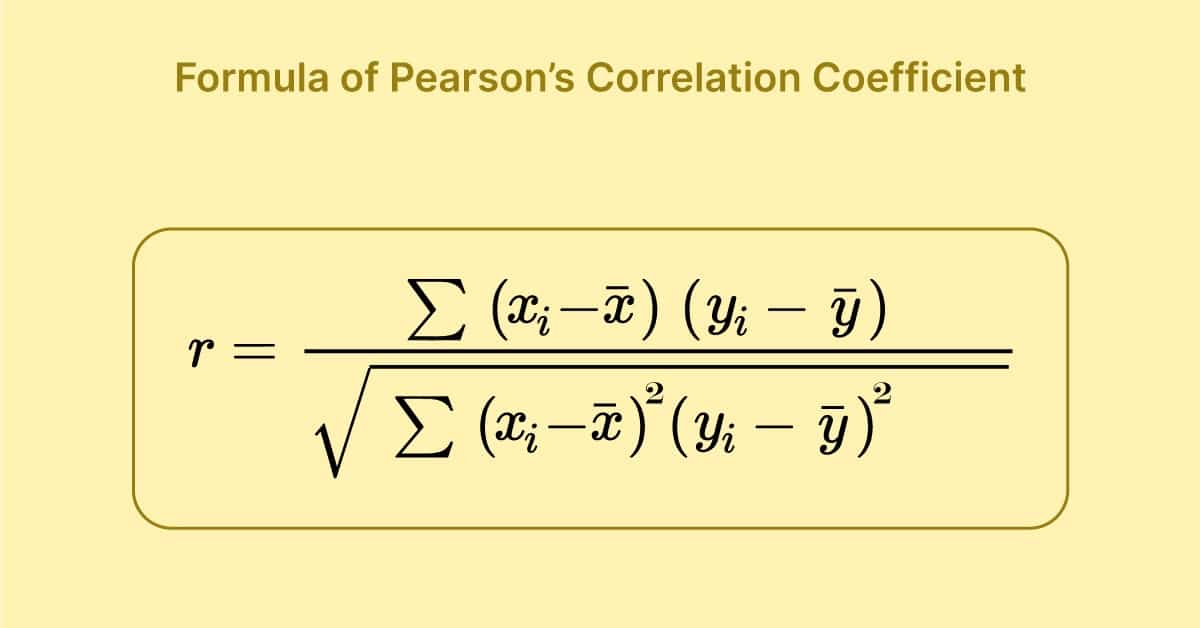

now for next step we choose the number of user are most similar to that. we can choose any number we wanted but it better to not very small or big to avoid overfit and for not to be exact.

In [29]:
# choose 100 user who are most similar to new user
userSubsetGroup = userSubsetGroup[0:100]

In [30]:
from math import sqrt

for this pearson calculate i add my own hashtag!(as before!) 

In [1]:
#we save this correlation in the dictonary.which the value is coefficient.
pearsonCorrelationDict = {}
#now we just calculate the pearson coefficient of any of the gropu(of users).
for name, group in userSubsetGroup: #most similiar.
    # we need to sort everything on the movieid.
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #get n.(which present in pearson.(sigma!))
    nRatings = len(group)
    #calculate the same movies which new user.
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #and then ofcourse we need the rating of same movies.(to use later.)
    tempRatingList = temp_df['rating'].tolist()
    #add a group for this ratings.
    tempGroupList = group['rating'].tolist()
    #calcualte pearson method
    # x and y is two diffrent user
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    #if we have 0 in denominator ,  put 0.and if don't have ,calculate pearson correlation as we see in formula.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


NameError: name 'userSubsetGroup' is not defined

 and now we can see this coefficients of item. that's all we need to the next step!


In [2]:
pearsonCorrelationDict.items() 

dict_items([])

first , we change format of this to DataFrame and pandas.
and now we add this coefficient to new cloumn named similarityondex.
and then we use the index of the first format to know which user have this coefficient!

In [3]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

NameError: name 'pd' is not defined

and we choose the users how have most similarity.

In [4]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50] 
topUsers.head()

NameError: name 'pearsonDF' is not defined

so now we add the all the rate this people give to any movies they watched.

In [5]:
# we merge this to have the rating of other movies.
# of course with dataset of rating_df , we add movieid and rating.
topUsersRating=topUsers.merge(rating_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

NameError: name 'topUsers' is not defined

okay. 
now we multipy the 2 matrix we have.(similarity and  rating of other movies.)
then we have "weighted index" for each movie. we sum this for each film and then we divide this to sum of weights(of users, mean sum of similarity of users for each movies. 

In [6]:
#multipy the rating and samilarity
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

NameError: name 'topUsersRating' is not defined

In [7]:
#and now we group this scores by movieId and then we have just two cloumn.
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

NameError: name 'topUsersRating' is not defined

In [8]:
#change form to DataFrame.we gonna fill this item we made.
recommendation_df = pd.DataFrame()
#we just divide the sum of rating(weighted rating ofcourse) to sum of the similarity index. there is final score.
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

NameError: name 'pd' is not defined

and now all we need to do is to sort this wighted average recommendation score and show the title/year/genres of movies!

let's do it:

In [9]:
# sort them and choose firts 10.
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

NameError: name 'recommendation_df' is not defined

In [10]:
#find them title/year/genres/.. by the movieId.
movie_df.loc[movie_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

NameError: name 'movie_df' is not defined